![](http://blog.tutorhub.com/wp-content/uploads/2012/03/exams1.jpg?w=1024)
# Introduction 
This dataset is obtained from this [website](http://roycekimmons.com/tools/generated_data/exams) and if we look under the disclaimer, we will see this statement: **"All data sets are fictional and should be used for educational purposes only."** Well, so before you make any further interpretation, do note that this data will work perfectly in an ideal world but in reality, we are far from achieving such results. Also, we have no idea what is the parameter set for this generator so if you are planning to work on your ML skills, do take the result as a grain of salt.

## Objective
- To identify correlation betweeen each variable and the test scores

## Importing packages 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Importing dataset into colab
# As we are working with colab, we will need to use the following code to import the dataset into this notebook
from google.colab import files 
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance (1).csv


## Create a function to generate an overview of the data 

In [5]:
def overview():
    '''
    Read a comma-separated values (csv) file into DataFrame.
    Print 5 rows of data
    Print number of rows and columns
    Print datatype for each column
    Print number of NULL/NaN values for each column
    Print summary data
    
    Return:
    data, rtype: DataFrame
    '''
    data = pd.read_csv("StudentsPerformance.csv")
    print("The first 5 rows if data are:\n", data.head())
    print("\n")
    print("The (Row,Column) is:\n", data.shape)
    print("\n")
    print("Data type of each column:\n", data.dtypes)
    print("\n")
    print("The number of null values in each column are:\n", data.isnull().sum())
    print("\n")
    print("Summary of all the test scores:\n", data.describe())
    return data

df = overview()

The first 5 rows if data are:
    gender race/ethnicity  ... reading score writing score
0  female        group B  ...            72            74
1  female        group C  ...            90            88
2  female        group B  ...            95            93
3    male        group A  ...            57            44
4    male        group C  ...            78            75

[5 rows x 8 columns]


The (Row,Column) is:
 (1000, 8)


Data type of each column:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


The number of null values in each column are:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math

- As expected from a generator, we do not see any NaN values.
- Also, the summary of the test score shows that the scores do not vary that much among the 3 types of test.

## Looking into distribution of test score among each variable

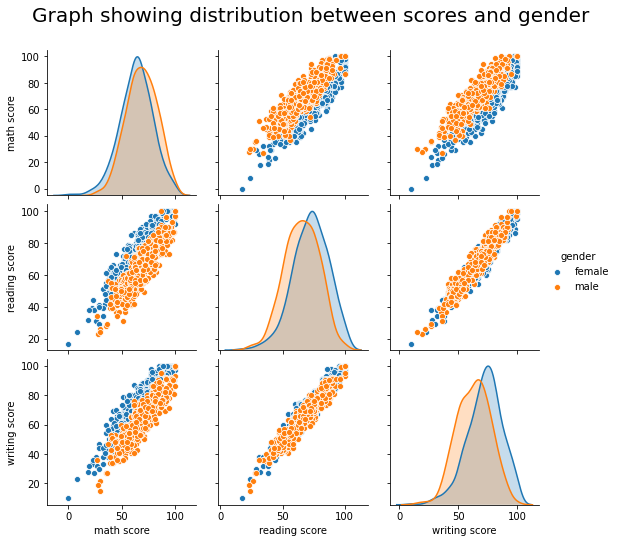

In [6]:
def distribution(dataset,variable):
    '''
    Args:
        dataset: Include DataFrame here
        variable: Include which column (categorical) in the data frame should be used for colour encoding.
    
    Returns:
    Seaborn plot with colour encoding
    '''
    g = sns.pairplot(data = dataset, hue = variable)
    g.fig.suptitle('Graph showing distribution between scores and {}'.format(variable), fontsize = 20)
    g.fig.subplots_adjust(top= 0.9)
    return g

distribution(df, 'gender')

- We can see that females tend to do better in reading and writing while males are better. I read an article from the Journal of Economic Perspectives and they stated that males have "superior" spatial skills that gave them the advantage. Back in history, males are heavily involved in hunting, an activity that required greater spatial orientation than females' tasks and that could explain why there are more males in STEM field. 
- So why do females tend to be better in reading and writing? There are few reasons. Research evidence has shown that girls use both brain hemispheres when presented with reading and writing tasks, whereas boys are more likely to using a single hemisphere of the brain. Another reason could be the gender differences in behavioral problems, such as physical aggression and disobeying rules, as well as attention disorders, which have been associated with general reading and writing impairments.

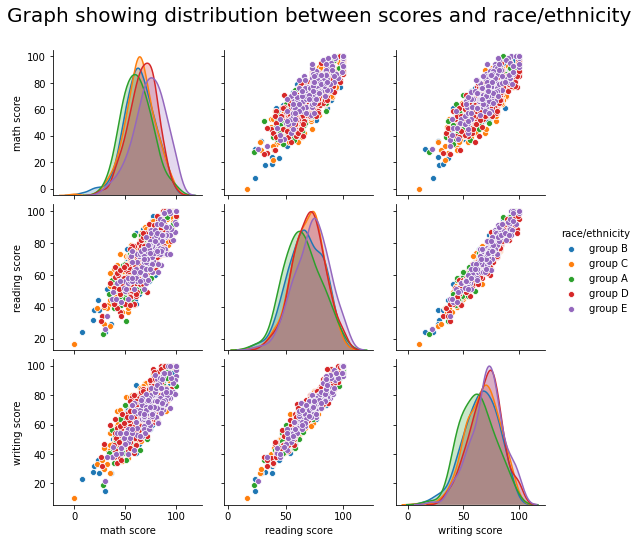

In [7]:
distribution(df, 'race/ethnicity')

- Well, this does not really tell us much since we do not know what each group represents

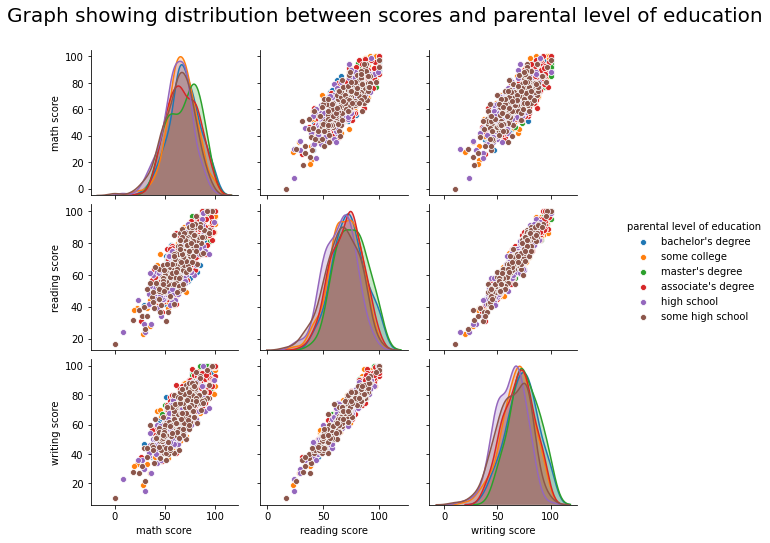

In [8]:
distribution(df, 'parental level of education')

- It seems to us that students with parents that held a Masters tend to do well for all 3 sections. This is followed by students with parents holding a Bachelor degree.
- If the parents have better education, the students will have a better advantage due to better guidance. In the real world it may not always be the case since some parents do not spend time with their children. Also, better educated parents tend to have higher income and can afford to send their children to tuition. 

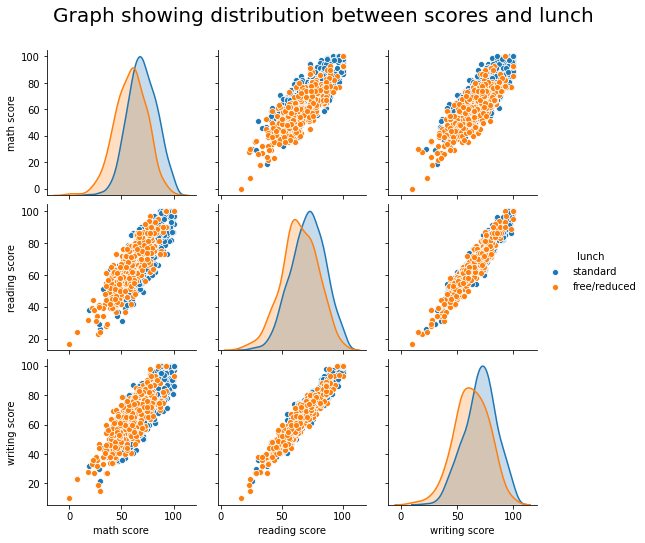

In [9]:
distribution(df, 'lunch')

- Students having standard lunch tend to perform better than those with free/reduced lunch. 
- Better lunch means having more energy to cope with the immense study load, yielding better results. 

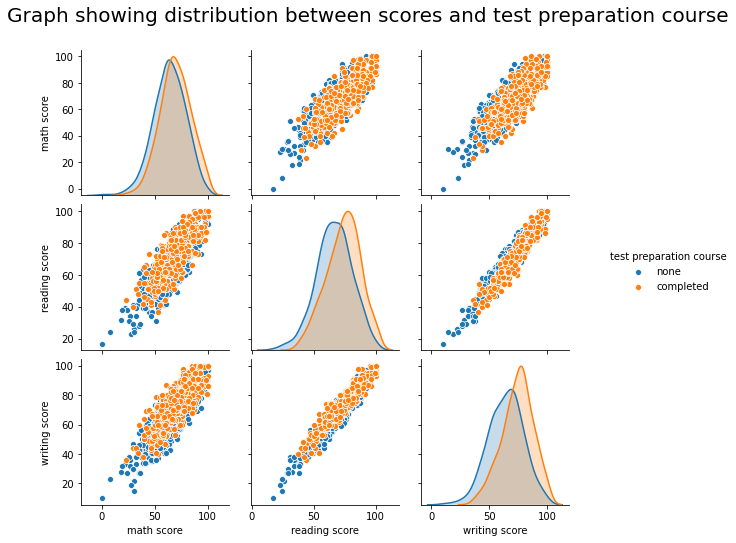

In [10]:
distribution(df, 'test preparation course')

- Needless to say, completing a test preparation course allows student to be better prepared for the actual test.

## Finding correlation between variables and test scores 
Given that all variables here is a categorical data, we will need to use 1-way ANOVA test to calculate correlation.
- We will be using 95% confidence interval (95% chance that the confidence interval you calculated contains the true population mean).
 * The null hypothesis is that they are independent.
 * The alternative hypothesis is that they are correlated in some way.

In [11]:
df.columns = ['gender', 'race', 'parental_edu', 'lunch', 'test_prep_course', 'math_score', 'reading_score', 'writing_score']

def anova_test(data, variable):
    '''
    Args: data (DataFrame), variable: Categorical columns that you want to do 1-way ANOVA test with
    
    Returns: Nothing
    '''
    x = ['math_score', 'reading_score', 'writing_score']
    for i,k in enumerate(x):
        lm = ols('{} ~ {}'.format(x[i],variable), data = data).fit()
        table = sm.stats.anova_lm(lm)
        print("P-value for 1-way ANOVA test between {} and {} is ".format(x[i],variable),table.loc[variable,'PR(>F)'])

anova_test(df, 'gender')

P-value for 1-way ANOVA test between math_score and gender is  9.120185549333453e-08
P-value for 1-way ANOVA test between reading_score and gender is  4.680538743934009e-15
P-value for 1-way ANOVA test between writing_score and gender is  2.0198777068682407e-22


- We obtained a P-value < 0.05, this means we can reject the null hypothesis and accept the alternative hypothesis that gender and the test scores are correlated.

In [12]:
anova_test(df, 'race')

P-value for 1-way ANOVA test between math_score and race is  1.3732194030370688e-11
P-value for 1-way ANOVA test between reading_score and race is  0.0001780089103235852
P-value for 1-way ANOVA test between writing_score and race is  1.0979189070066777e-05


- We obtained a P-value < 0.05, this means we can reject the null hypothesis and accept the alternative hypothesis that race and the test scores are correlated.

In [13]:
anova_test(df, 'parental_edu')

P-value for 1-way ANOVA test between math_score and parental_edu is  5.592272384108375e-06
P-value for 1-way ANOVA test between reading_score and parental_edu is  1.1682457045709003e-08
P-value for 1-way ANOVA test between writing_score and parental_edu is  1.1202799969774331e-13


- We obtained a P-value < 0.05, this means we can reject the null hypothesis and accept the alternative hypothesis that parents' education and the student's test scores are correlated.

In [14]:
anova_test(df, 'lunch')

P-value for 1-way ANOVA test between math_score and lunch is  2.413195599315183e-30
P-value for 1-way ANOVA test between reading_score and lunch is  2.0027966545288553e-13
P-value for 1-way ANOVA test between writing_score and lunch is  3.1861895831680456e-15


- We obtained a P-value < 0.05, this means we can reject the null hypothesis and accept the alternative hypothesis that quality/type of lunch and the student's test scores are correlated.

In [15]:
anova_test(df, 'test_prep_course')

P-value for 1-way ANOVA test between math_score and test_prep_course is  1.5359134607155386e-08
P-value for 1-way ANOVA test between reading_score and test_prep_course is  9.081783336895556e-15
P-value for 1-way ANOVA test between writing_score and test_prep_course is  3.6852917352476696e-24


- We obtained a P-value < 0.05, this means we can reject the null hypothesis and accept the alternative hypothesis that test preparation courses and the student's test scores are correlated.

## Does the education level of the parents really affect the student's score?

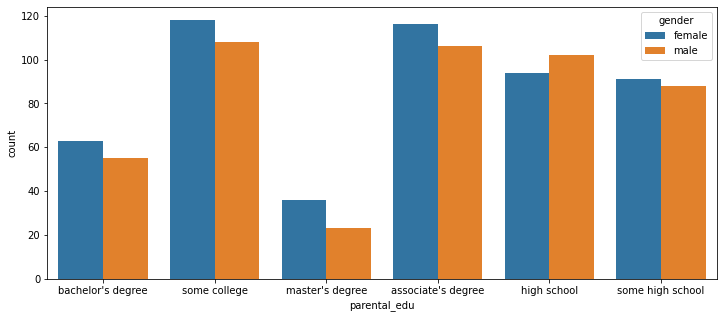

In [16]:
plt.figure(figsize=(12,5))

sns.countplot(data = df, x = 'parental_edu', hue = 'gender')

- We can see that there are only a few students whose parents have a Masters or Bachelor degree. Hence, I don't think we can confidently say that students with highly educated parents will score better. 

## Summary
- Our Chi-square test shows that all variables are correlated to test scores. This is much expected from values created from generators.
- We observe that females are better performed in writing and reading while males are better in math. Part of the reason could be due to evolutionary traits that provide males with "superior" spatial traits. In females, studies have shown that they use both brain hemispheres when presented with reading and writing tasks, whereas boys are more likely to using a single hemisphere of the brain.
- Students that have highly educated parents tend to perform better but due to the small sample size, it's hard to confirm that hypothesis. 
- Students that have standard lunches performed better as they have higher energy levels that can support their immense study loads.
- Students who took test preparation courses did significantly better since they are better trained with resources that can help them in an actual setting. 